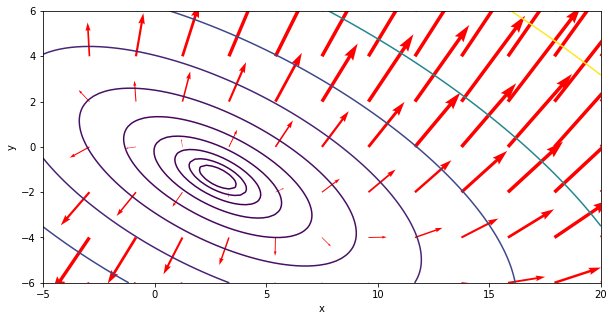

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y): #원래 함수
    return 2*x**2 + 4*x*y + 5*y**2 - 6*x + 2* y + 10

def dx(x,y): #x에 대한 편미분
    return 4*x + 4*y - 6

def dy(x,y):
    return 4*x + 10 * y + 2

xi = np.linspace(-5, 20, 100) #전체 격자
yi = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(xi, yi)
Z = f(X,Y)

xj = np.linspace(-5, 20, 13)
yj = np.linspace(-6, 6, 7)
X1, Y1 = np.meshgrid(xj, yj)
Dx = dx(X1, Y1) # x에 대한 편미분
Dy = dy(X1, Y1) # y에 대한 편미분

plt.figure(figsize = (10,5))
plt.contour(X, Y, Z, levels = np.logspace(0, 3, 10)) #X, Y 좌표에 Z값에 따라 색깔을 다르게 하는 등고선
plt.quiver(X1, Y1, Dx, Dy, color = 'red', scale = 500, minshaft = 4) # arrow 위치, 가르키는 방향
#--> gradient를 가르킴
plt.xlabel('x')
plt.ylabel('y')
plt.show()

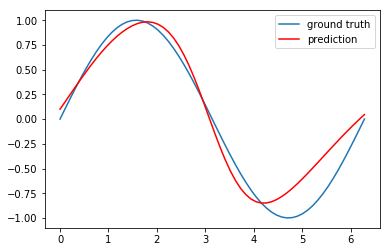

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class MLP:
    def __init__(self, hidden_node = 3):
        # 1 * 3 * 1 network
        self.input_node = 1 
        self.hidden_node = hidden_node
        self.output_node= 1
        #weight and bias initialize
        self.w1 = np.random.rand(self.hidden_node, self.input_node)
        self.b1 = np.random.rand(self.hidden_node, 1)
        self.w2 = np.random.rand(self.output_node, self.hidden_node)
        self.b2 = np.random.rand(self.output_node, 1)
    
    def sigmoid(self, x): #sigmoid
        return 1 / (1 + np.exp(-x))
    
    def d_sigmoid(self, x): #sigmoid 미분
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def train(self, train_x, train_y, alpha = 0.1, max_iter = 500):
        np.random.seed(0)
        input_node = self.input_node
        hidden_node = self.hidden_node
        output_node = self.output_node
        alpha = alpha
        max_iter = max_iter
        
        for iter in range(1, max_iter): #최대 max_iter만큼 train
            for i in range(n_train):
                #first layer
                z1 = np.dot(self.w1, train_x[i].reshape(1,1)) + self.b1 
                a1 = self.sigmoid(z1) 
                
                #secound layer
                z2 = np.dot(self.w2, a1) + self.b2
                y_hat = z2
                y_hat_list[i] = y_hat
                
                e = 0.5 * (train_y[i] - y_hat) ** 2 # calculate error cost
                dy = -(train_y[i] - y_hat) # dE / dy
                dz2 = 1 # (dy / dz2)
                dw2 = a1.T # dz2 / dw2
                delta_w2 = dy * dz2 * dw2
                delta_b2 = dy * dz2
                
                da1 = self.w2.T # dz2 / da1 
                dz1 = self.d_sigmoid(z1) # da1 / dz1
                dw1 = train_x[i].T # dz1 / dw1
                delta_w1 = dy * dz2 * da1 * dz1 * dw1 
                delta_b1 = dy * dz2 * da1 * dz1
                self.w2 -= alpha * delta_w2
                self.b2 -= alpha * delta_b2
                self.w1 -= alpha * delta_w1
                self.b1 -= alpha * delta_b1
                
    def predict(self, test_x):
        for i in range(n_test):
            z1 = np.dot(self.w1, test_x[i].reshape(1,1)) + self.b1 # w1 * x1 + b1
            a1 = self.sigmoid(z1)
            z2 = np.dot(self.w2, a1) + self.b2 # w2 * a1 + b2
            y_hat = z2
            y_hat_list[i] = y_hat
        return y_hat_list
    
n_train = 29
train_x = np.linspace(0, np.pi * 2, n_train)
train_y = np.sin(train_x)

n_test = 60
test_x = np.linspace(0, np.pi * 2, n_test)
test_y = np.sin(test_x)
y_hat_list = np.zeros(n_test)

mlp = MLP(hidden_node=4)
mlp.train(train_x, train_y, max_iter = 600)
plt.plot(test_x, test_y, label = 'ground truth')

y_hat_list = mlp.predict(test_x)
plt.plot(test_x, y_hat_list, '-r', label = 'prediction')
plt.legend()
plt.show()

In [18]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

wine = load_wine()
data = pd.DataFrame(data = wine['data'], columns = wine['feature_names'])
print(data.head())

X = wine.data
Y = wine.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

scaler = StandardScaler() #normalization
scaler.fit(X_train) # 데이터에 맞게 scaler fit
StandardScaler(copy = True, with_mean = True, with_std = True)

X_train = scaler.transform(X_train) # data normalization
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter = 500)
mlp.fit(X_train, Y_train) #train
predictions = mlp.predict(X_test) # use
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  